In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: [Monday, Mar 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

_Type your answer here, replacing this text._

In [3]:
credit_df = pd.read_csv("data/UCI_Credit_Card.csv", index_col=0)
credit_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [89]:
# print(credit_df)
y = credit_df["default.payment.next.month"] # 1=defaulted, 0=didn't default
X = credit_df.iloc[:,:-1] # Select all columns except the y, default data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)
train_df = pd.concat([X_train,y_train],axis=1)
test_df = pd.concat([X_test,y_test],axis=1)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

Overall Summaries and Descriptions of the Dataframe:

In [5]:
print(train_df.head())

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                            
16396   320000.0    2          1         2   36      0      0      0      0   
21449   440000.0    2          1         2   30     -1     -1     -1      0   
20035   160000.0    2          3         1   44     -2     -2     -2     -2   
25756   120000.0    2          2         1   30      0      0      0      0   
1439     50000.0    1          2         2   54      1      2      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
ID            ...                                                        
16396      0  ...    19370.0    10155.0     3788.0    5000.0    5018.0   
21449      0  ...   171244.0   150897.0   117870.0     612.0   87426.0   
20035     -2  ...      -18.0      -18.0      -18.0       0.0       0.0   
25756      0  ...   103058.0    71095.0    47379.0    3706.0    5502.0   
14

Limit balance, bill amounts, and pay ammounts are all high values as they are in NTD units. Sex, education, and marrage are categorical with the numbers representing a class. Age is in years and Pay is ordinal with lower values being paid sooner and higher values being delayed later. 

The values in Pay is from the range -2 to 9 with -2: No pay needed, -1:Paid Dutily, 1: 1 month delayed, 2: 2 months delayed, ..., 9: 9 months delayed.

In [6]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16396 to 19967
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   21000 non-null  float64
 1   SEX                         21000 non-null  int64  
 2   EDUCATION                   21000 non-null  int64  
 3   MARRIAGE                    21000 non-null  int64  
 4   AGE                         21000 non-null  int64  
 5   PAY_0                       21000 non-null  int64  
 6   PAY_2                       21000 non-null  int64  
 7   PAY_3                       21000 non-null  int64  
 8   PAY_4                       21000 non-null  int64  
 9   PAY_5                       21000 non-null  int64  
 10  PAY_6                       21000 non-null  int64  
 11  BILL_AMT1                   21000 non-null  float64
 12  BILL_AMT2                   21000 non-null  float64
 13  BILL_AMT3                   2100

There are no null values all all 21k entries are filled so nothing needs to be replaced.

In [7]:
print(train_df.describe())

            LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean    167880.651429      1.600762      1.852143      1.554000     35.500810   
std     130202.682167      0.489753      0.792961      0.521675      9.212644   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean      -0.015429     -0.137095     -0.171619     -0.225238     -0.264429   
std        1.120465      1.194506

The min and max values of each feature in NTD has a very large range but lower standard deviation which implies the maximum values can skew the data if improperly handled.

In [8]:
numeric_features = ["LIMIT_BAL", "AGE",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]
categorical_features = ["EDUCATION","MARRIAGE"]
ordinal_features = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
binary_features = ["SEX"]
drop_features = [] # Nothing is dropped

target = "default.payment.next.month"

Number of defaults are rarer compared to non-defaults which can make accuracy a poor metric. Since the cost of a false negative, lending money to a potential defaulter, is much more costly than a false positive, rejecting to lend money to a non-defaulter,  the metric we will use will be recall as it prioritizes catching false negatives.

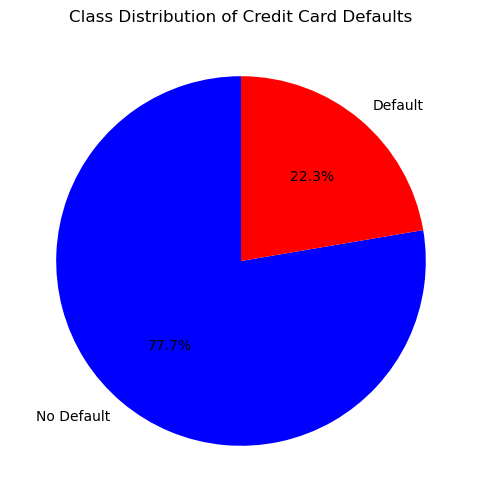

In [9]:
class_counts = train_df["default.payment.next.month"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=["No Default", "Default"], autopct="%1.1f%%", colors=["blue", "red"], startangle=90)
plt.title("Class Distribution of Credit Card Defaults")
plt.show()

From a visual anaysis, we can see that limit balance has the largest impact as people who defaulted tend to have a low limit balance while those who didn't default had higher limit balances.

People who don't default spikes at approximate age of 27 while people who do default are less common at that age. At around 25 years old both default and not defaulting are simimlarly dense. At ages 43 and 47 people tend to not default and default respectivly. 

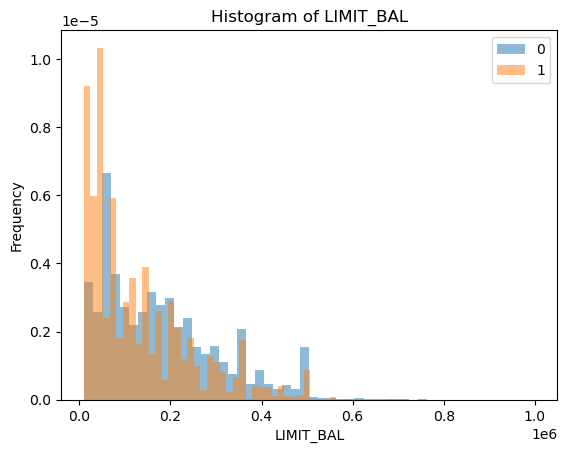

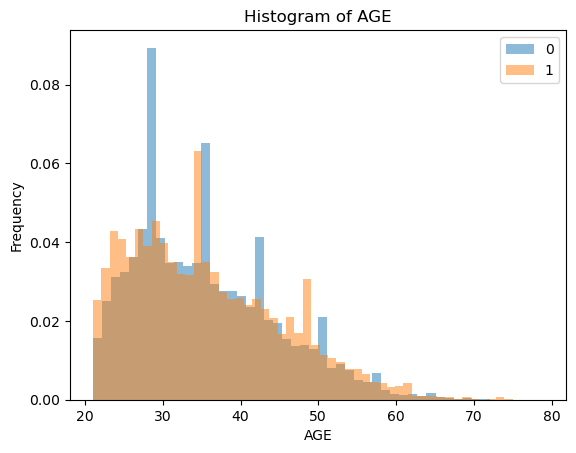

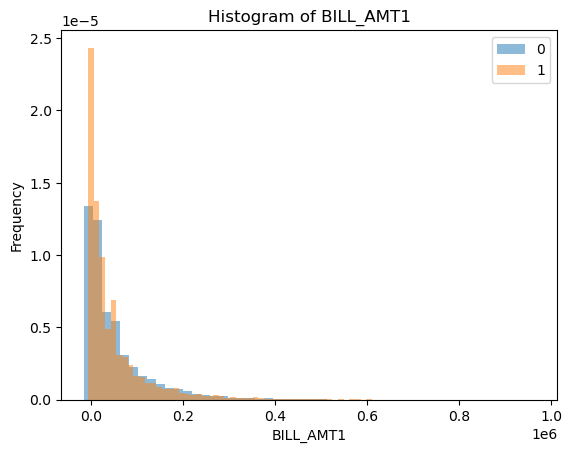

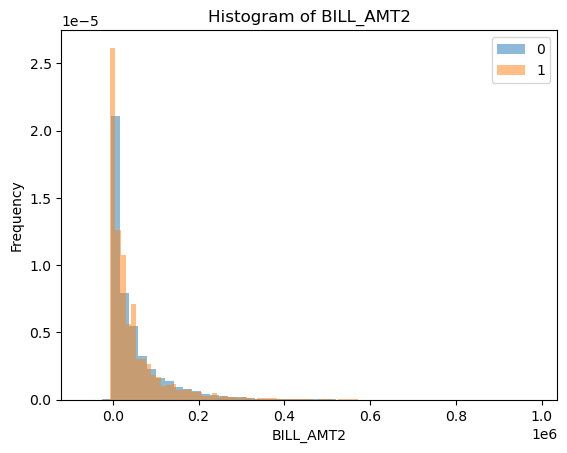

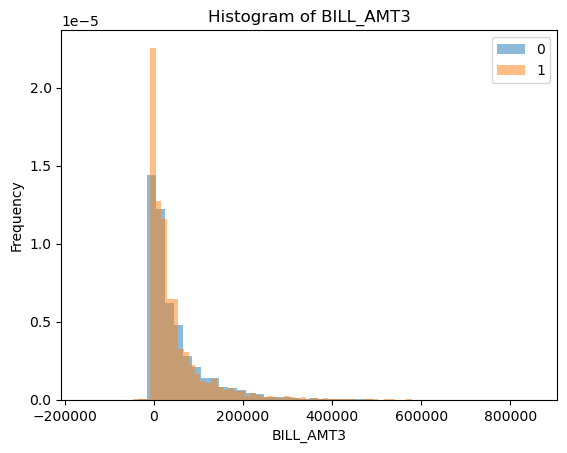

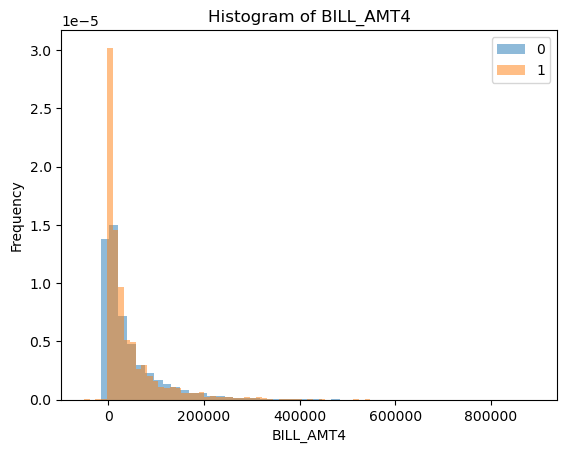

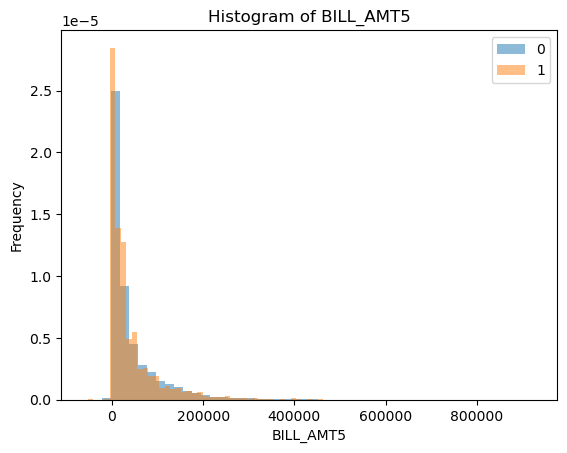

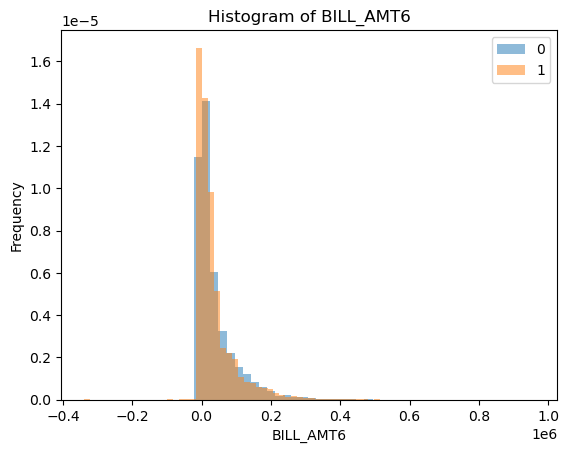

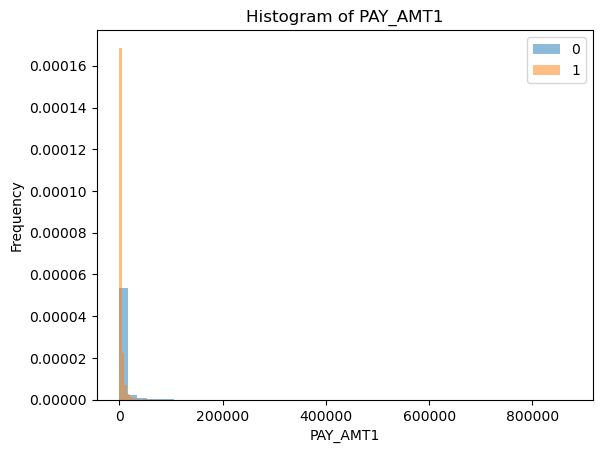

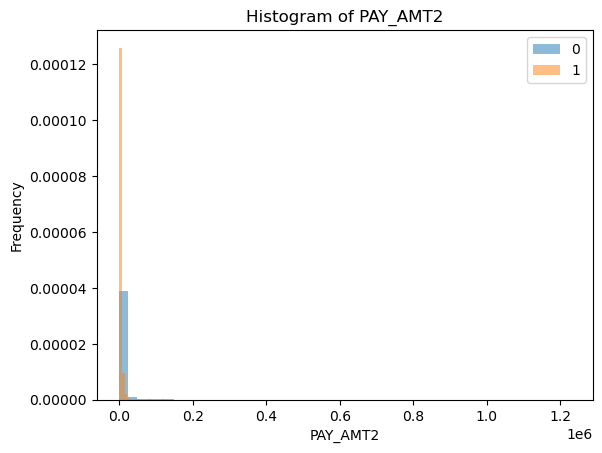

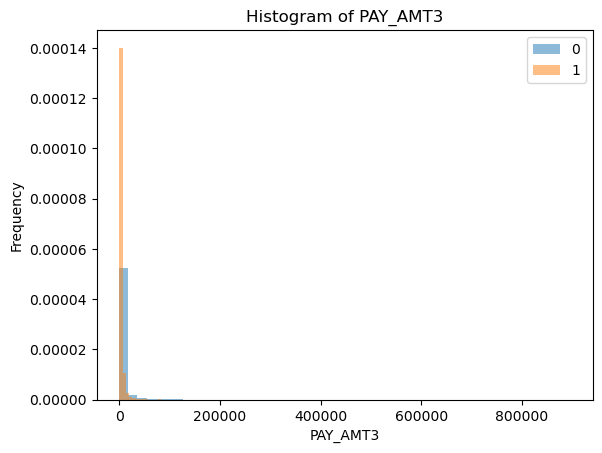

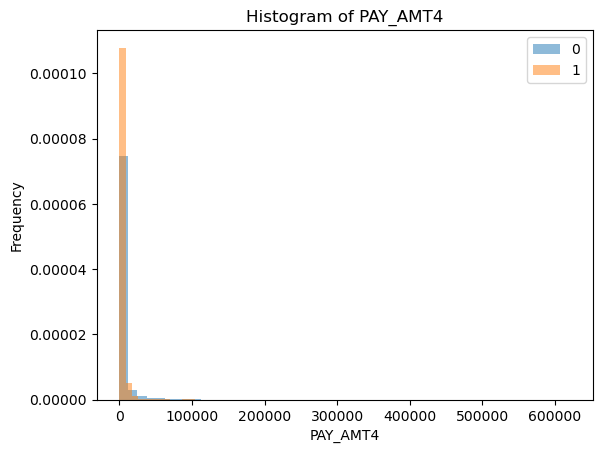

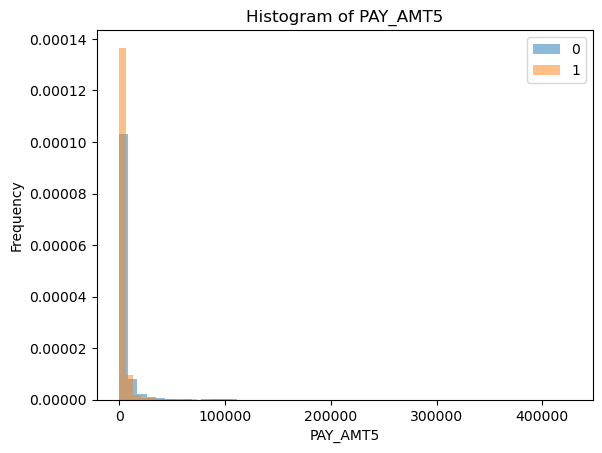

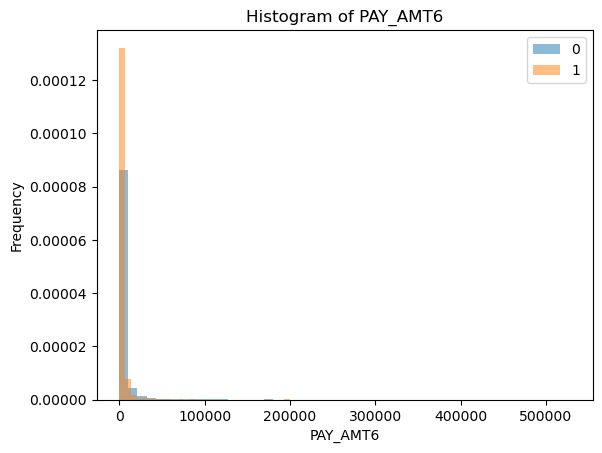

In [10]:
# Adapted from homework 3
feat = numeric_features
for i in range(len(feat)):
    train_df.groupby("default.payment.next.month")[feat[i]].plot.hist(bins=50, alpha=0.5, legend=True, density = True, title = "Histogram of " + feat[i]);
    plt.xlabel(feat[i])
    plt.show()

In [11]:
...

Ellipsis

In [12]:
...

Ellipsis

In [13]:
...

Ellipsis

In [14]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

<!-- END QUESTION -->

<br><br>

In [90]:
X_train = X_train.assign(
    DEBT1=train_df["BILL_AMT1"] - train_df["PAY_AMT1"],
    DEBT2=train_df["BILL_AMT2"] - train_df["PAY_AMT2"],
    DEBT3=train_df["BILL_AMT3"] - train_df["PAY_AMT3"],
    DEBT4=train_df["BILL_AMT4"] - train_df["PAY_AMT4"],
    DEBT5=train_df["BILL_AMT5"] - train_df["PAY_AMT5"],
    DEBT6=train_df["BILL_AMT6"] - train_df["PAY_AMT6"],
)
X_test = X_test.assign(
    DEBT1=test_df["BILL_AMT1"] - test_df["PAY_AMT1"],
    DEBT2=test_df["BILL_AMT2"] - test_df["PAY_AMT2"],
    DEBT3=test_df["BILL_AMT3"] - test_df["PAY_AMT3"],
    DEBT4=test_df["BILL_AMT4"] - test_df["PAY_AMT4"],
    DEBT5=test_df["BILL_AMT5"] - test_df["PAY_AMT5"],
    DEBT6=test_df["BILL_AMT6"] - test_df["PAY_AMT6"],
)

X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEBT1,DEBT2,DEBT3,DEBT4,DEBT5,DEBT6
ID,,,,,,,,,,,,,,,,,,,,,
16396,320000.0,2,1,2,36,0,0,0,0,0,...,1000.0,3000.0,0.0,7013.0,24026.0,23161.0,27695.0,16370.0,10155.0,-3225.0
21449,440000.0,2,1,2,30,-1,-1,-1,0,0,...,130007.0,3018.0,15000.0,51663.0,165.0,-86814.0,-42581.0,168226.0,135897.0,66207.0
20035,160000.0,2,3,1,44,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,-18.0,-18.0,-18.0,-18.0,-18.0,-18.0
25756,120000.0,2,2,1,30,0,0,0,0,0,...,4204.0,3017.0,2005.0,1702.0,97890.0,97358.0,100490.0,100041.0,69090.0,45677.0
1439,50000.0,1,2,2,54,1,2,0,0,0,...,1200.0,1500.0,1000.0,1500.0,48153.0,45485.0,25968.0,26085.0,26910.0,25880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28637,380000.0,2,2,1,37,0,0,0,0,0,...,1242.0,1900.0,0.0,3000.0,12211.0,13081.0,12035.0,12391.0,15949.0,12556.0
17731,360000.0,2,1,1,54,1,-2,-2,-1,0,...,2580.0,0.0,6941.0,0.0,0.0,0.0,-2580.0,2580.0,-4361.0,6941.0
28031,50000.0,2,3,1,29,0,0,0,0,0,...,1530.0,1000.0,327.0,329.0,45192.0,46381.0,45247.0,38420.0,8497.0,8680.0


<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [91]:
# Post Feature Selection:
numeric_features = ["LIMIT_BAL", "AGE", "DEBT1", "DEBT2", "DEBT3", "DEBT4", "DEBT5", "DEBT6"]
categorical_features = ["EDUCATION", "MARRIAGE"]
ordinal_features = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
binary_features = ["SEX"]
drop_features = ["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]

target = "default.payment.next.month"

In [92]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore",sparse_output=False)
# PAY_X is already on the scale of -2 to 9 in order and so no ordinal transformation is neccesary.
binary_transformer = OneHotEncoder(drop="if_binary", dtype=int, sparse_output=False)

In [93]:
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    ("passthrough", ordinal_features),
    (binary_transformer, binary_features),
    (categorical_transformer, categorical_features),
    ("drop", drop_features)
)

In [94]:
transformed_df = preprocessor.fit_transform(X_train)
n_new_cols = transformed_df.shape[1] - X_train.shape[1]

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [95]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model with recall as the scoring metric
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs, scoring='recall')

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [96]:
results_dict = {}  # dictionary to store all the results

# Baseline Dummy Model: Adapted from HW3

dummy = DummyClassifier(random_state = 123)
pipe = make_pipeline(preprocessor, dummy)
results_dict["dummy"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True
)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.011 (+/- 0.001),0.005 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000)


The above result is very uninformative since the number of non-default is significantly larger than the number of defaults, the dummy classifier will always predict not default. Recall however measures the amount of correct default predictions and since the model never predicts default, its will never make a coorect prediction.

A test score of 0 is reasonable given the metric that is used to judge the model.

In [21]:
...

Ellipsis

In [22]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [104]:
from sklearn.linear_model import LogisticRegression 
# Linnear Regressor Model: Adapted from Lecture 7

scores_dict = {
    "C": 10.0 ** np.arange(-4, 7, 1),
    "mean_train_scores": list(),
    "mean_cv_scores": list(),
}
for C in scores_dict["C"]:
    lr = LogisticRegression(C=C)
    pipe = make_pipeline(preprocessor, lr)
    scores = mean_std_cross_val_scores(
        pipe, X_train, y_train, cv=5, return_train_score=True
        )
    scores_dict["mean_train_scores"].append(scores["train_score"])
    scores_dict["mean_cv_scores"].append(scores["test_score"])
results_df = pd.DataFrame(scores_dict)
results_df

,C,mean_train_scores,mean_cv_scores
0,0.0001,0.025 (+/- 0.002),0.025 (+/- 0.005)
1,0.0010,0.173 (+/- 0.006),0.173 (+/- 0.015)
2,0.0100,0.233 (+/- 0.008),0.231 (+/- 0.013)
3,0.1000,0.246 (+/- 0.007),0.245 (+/- 0.009)
4,1.0000,0.247 (+/- 0.007),0.246 (+/- 0.008)
5,10.0000,0.248 (+/- 0.007),0.247 (+/- 0.008)
6,100.0000,0.248 (+/- 0.008),0.246 (+/- 0.008)
7,1000.0000,0.247 (+/- 0.008),0.246 (+/- 0.009)
8,10000.0000,0.248 (+/- 0.007),0.247 (+/- 0.008)
9,100000.0000,0.248 (+/- 0.007),0.247 (+/- 0.008)


From this result, since both the test and train scores were low across all hyper-parameters, it could mean the data is not linearly seperable. Since we are using a scoring metric of recall, this also implies that a linear model performs poorly at detecting false negatives.

In [25]:
...

Ellipsis

In [26]:
...

Ellipsis

In [27]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

All the models have been consistantly better performing than the linear model. As we used cross-validation for all of our models, none of them had a high CV score and therefore did not overfit the data. Using random searches for hyper-parameter tuning also allowed us to avoid underfitting by having a variable model complexity and selecting the best performing one.

Even though these other models have a higher test score compared to previous models, being unable to get over a 37% recall is still fairly low. It is possible that the features used does not strongly correlate with if a person will default.

In [ ]:
# Adapted from lecture 12
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    'randomforestclassifier__n_estimators': np.arange(10, 200, 10), 
    'randomforestclassifier__max_features': ['sqrt', 'log2'], 
    'randomforestclassifier__max_depth': [None, 10, 20, 30, 40, 50],
}

pipe_rf = make_pipeline(
    preprocessor,
    RandomForestClassifier(
        n_jobs=-1,
        random_state=123,
        bootstrap=True
    ),
)

random_search = RandomizedSearchCV(pipe_rf, param_distributions=param_dist, n_iter=50, cv=5, random_state=123, n_jobs=-1)
random_search.fit(X_train,y_train)
best_param = random_search.best_params_
print("Best param:", best_param)
results_dict["Random forests"] = mean_std_cross_val_scores(
    random_search.best_estimator_, X_train, y_train, return_train_score=True
)
results_df = pd.DataFrame(results_dict).T
results_df

Best param: {'randomforestclassifier__n_estimators': np.int64(150), 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 10}


,fit_time,score_time,test_score,train_score
dummy,0.011 (+/- 0.001),0.005 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000)
Random forests,0.281 (+/- 0.006),0.033 (+/- 0.005),0.360 (+/- 0.015),0.448 (+/- 0.004)


In [29]:
...

Ellipsis

In [30]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [31]:
...

Ellipsis

In [32]:
...

Ellipsis

In [33]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [34]:
...

Ellipsis

In [35]:
...

Ellipsis

In [36]:
...

Ellipsis

In [37]:
...

Ellipsis

In [38]:
...

Ellipsis

In [39]:
...

Ellipsis

In [40]:
...

Ellipsis

In [41]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [42]:
...

Ellipsis

In [43]:
...

Ellipsis

In [44]:
...

Ellipsis

In [45]:
...

Ellipsis

In [46]:
...

Ellipsis

In [47]:
...

Ellipsis

In [48]:
...

Ellipsis

In [49]:
...

Ellipsis

In [50]:
...

Ellipsis

In [51]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [52]:
...

Ellipsis

In [53]:
...

Ellipsis

In [54]:
...

Ellipsis

In [55]:
...

Ellipsis

In [56]:
...

Ellipsis

In [57]:
...

Ellipsis

In [58]:
...

Ellipsis

In [59]:
...

Ellipsis

In [60]:
...

Ellipsis

In [61]:
...

Ellipsis

In [62]:
...

Ellipsis

In [63]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [64]:
...

Ellipsis

In [65]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)